In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
from model import color_gan
from skimage import color
from model.unet import GrayLayer
%matplotlib inline

In [7]:
image_paths = ['test_images/201%s.jpg' % x for x in [2,3,4,5,6]]

In [11]:
crop = transforms.RandomCrop([256, 256])
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

def rgb2lab(img):
    return color.rgb2lab(img)

def lab2rgb(img):
    return color.lab2rgb(img)

def crop_image(img):
    """
    Random crop images to 256 * 256
    :param img:
    :return:
    """
    if img.size[0] < 256 or img.size[1] < 256:
        img = resize(img)

    img = crop(img)
    img = np.array(img)
    lab_image = rgb2lab(img)
    return torch.FloatTensor([lab_image[:,:,0]]), \
           torch.FloatTensor([lab_image[:,:,0], lab_image[:,:,1],lab_image[:,:,2]])


In [12]:
images = [Image.open(p) for p in image_paths]

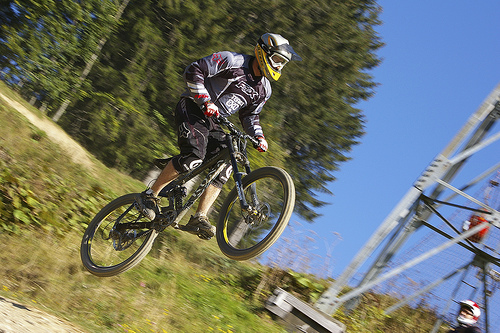

In [17]:
image_ = images[3]
image_

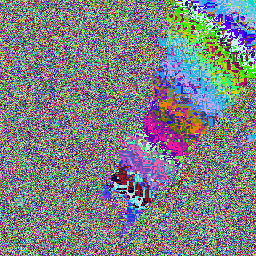

In [52]:
l, lab = crop_image(image_)
to_pil(lab)

In [40]:
input_tensor = Variable(l)


torch.Size([1, 256, 256])

In [23]:
import collections
Opt = collections.namedtuple('Opt', 'train, gpu')
opt = Opt(
    train=False,
    gpu=False
)

In [24]:
model = color_gan.ColorGAN(opt)

init network


In [26]:
model.load_state_dict('model_params/generator_cpu_params_1199.pth')

Load State Dict finished


In [42]:
result_out = model.inference(input_tensor.unsqueeze(0))

In [43]:
result_out.size()

torch.Size([1, 3, 256, 256])

(256, 256, 3)
[[[ 0.01920862  0.0025915   0.        ]
  [ 0.02280438  0.01140364  0.00788146]
  [ 0.00805586  0.00513774  0.00540166]
  ..., 
  [ 0.00243951  0.00146398  0.00162035]
  [ 0.02355758  0.01077924  0.01340378]
  [ 0.00820351  0.00267703  0.        ]]

 [[ 0.00531579  0.00184194  0.0018345 ]
  [ 0.00582279  0.00220751  0.00138112]
  [ 0.01414828  0.00091033  0.        ]
  ..., 
  [ 0.01702287  0.0024161   0.        ]
  [ 0.01151458  0.          0.        ]
  [ 0.00973058  0.          0.        ]]

 [[ 0.01173791  0.00752883  0.        ]
  [ 0.01534148  0.00237513  0.00431322]
  [ 0.01993191  0.00561087  0.        ]
  ..., 
  [ 0.00820571  0.00315596  0.00361361]
  [ 0.01858317  0.00480316  0.00023416]
  [ 0.01261503  0.01153616  0.01094643]]

 ..., 
 [[ 0.01343818  0.00429272  0.00257786]
  [ 0.01967475  0.00652744  0.00635609]
  [ 0.01539082  0.00295951  0.        ]
  ..., 
  [ 0.01566845  0.00954841  0.0092106 ]
  [ 0.01604013  0.          0.        ]
  [ 0.02592931  0.011

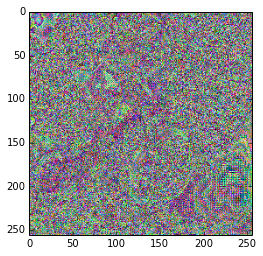

In [50]:

result = to_pil(result_out[0].data)
result = np.array(result)
plt.imshow(result)
result = lab2rgb(result)
print(result.shape)
print(result)